In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
import io
import requests


import warnings
warnings.filterwarnings('ignore')

#import all the necessary liabriries requried if needed with insert more 

In [2]:
df_train = pd.read_csv(r'C:\Users\SOOQ ELASER\Desktop\termdeposit_train.csv')
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df_test = pd.read_csv(r'C:\Users\SOOQ ELASER\Desktop\termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
df_test = df_test.drop('poutcome',axis=1)

In [5]:
df_test.columns
#column name of test dataset

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous'],
      dtype='object')

In [6]:
df_train.columns
#column name of train dataset

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df_train.info()
#there is integer and object value in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
df_test.info()
#there is integer and object value in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.7+ MB


In [9]:
df_train.isnull().sum()
#no null value in train data set

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
df_test.isnull().sum()
#no null value in test data set

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

In [11]:
print(df_test.duplicated().any())
print(df_train.duplicated().any())
# No duplicate values in datset

False
False


In [12]:
print(df_train.shape)
print(df_test.shape)
#In train 31647 rows and 18 column including target variable
# In test 13564 rows and 17 column contains

(31647, 18)
(13564, 16)


In [13]:
df_train['subscribed'].value_counts()
#check how many is postive and negative 

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

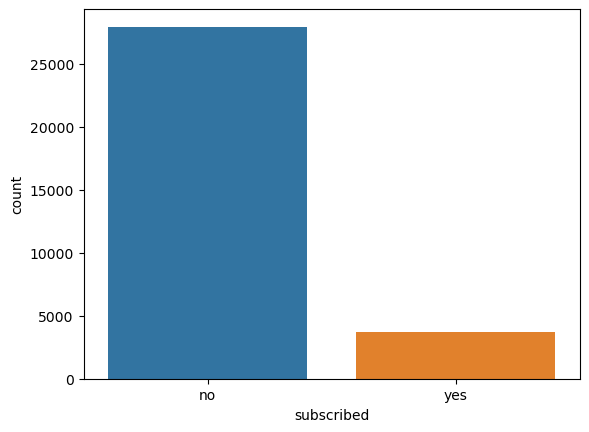

In [14]:
sns.countplot(data=df_train,x='subscribed')
#checked with countplot also 

In [15]:
df_train['job'].value_counts()
#frequency for job in train datset
#blue-collor is the highest in job count 

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [16]:
df_test['job'].value_counts()
#frequency for job in test datset
#blue-collor is the highest in job count 

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

<AxesSubplot:>

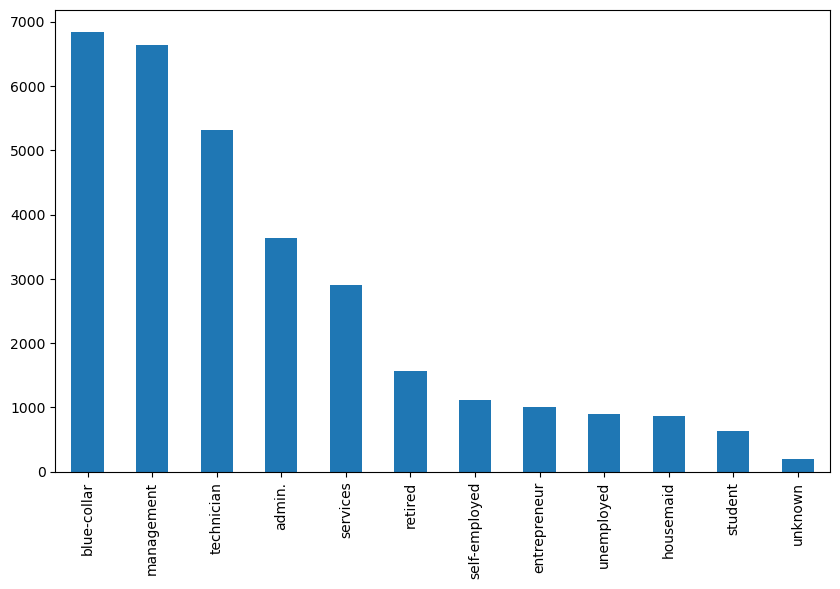

In [17]:
df_train['job'].value_counts().plot(kind='bar', figsize=(10,6))
#blue-collor is the highest in job count & second highest is managment job 

In [18]:
df_train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

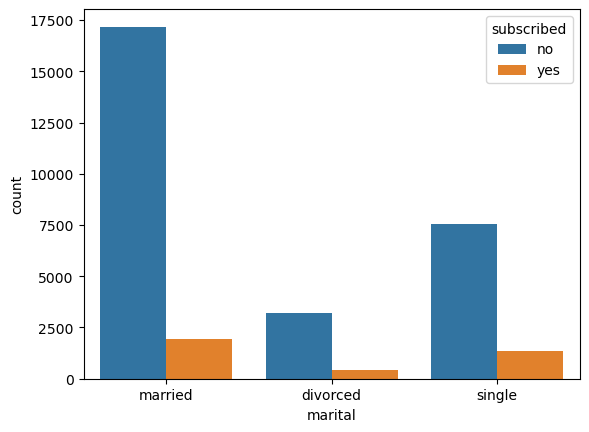

In [19]:
sns.countplot(data=df_train,x='marital', hue= 'subscribed')
#comparing a relation between marital and subscribes weather ho many martial perople have taken the subscription

In [20]:
df_test['marital'].value_counts()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

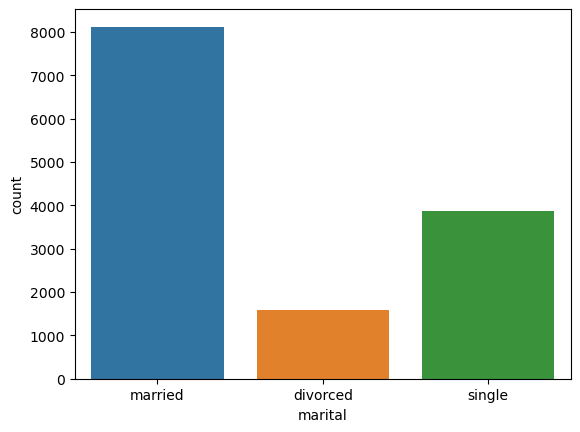

In [21]:
sns.countplot(data=df_test,x='marital')
#checked with countplot also 

In [22]:
pd.crosstab(df_train['marital'],df_train['subscribed'])
#marital vs subscribed cmparison of yes or no    

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


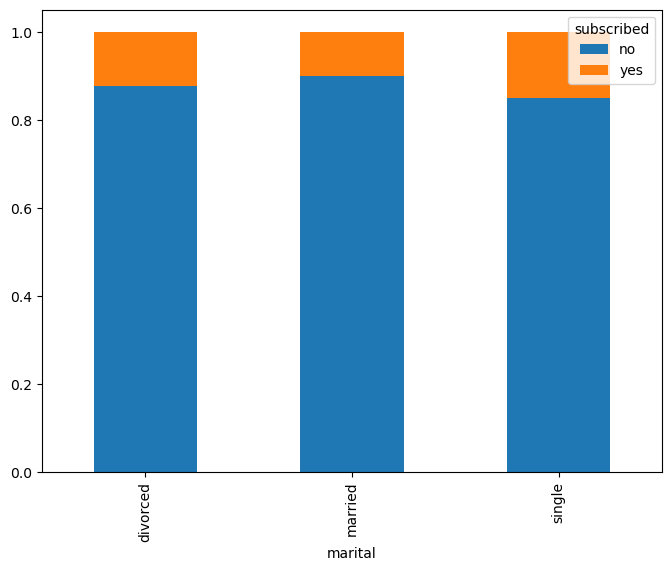

In [23]:
job =  pd.crosstab(df_train['marital'],df_train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=True,figsize=(8,6));
#its not showing much impact on subscription

In [24]:
df_test['age']
#age factor 

0        32
1        78
2        31
3        57
4        45
         ..
13559    39
13560    54
13561    35
13562    29
13563    29
Name: age, Length: 13564, dtype: int64

In [25]:
df_train['age']
#age factor 

0        56
1        31
2        27
3        57
4        31
         ..
31642    29
31643    53
31644    32
31645    57
31646    55
Name: age, Length: 31647, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

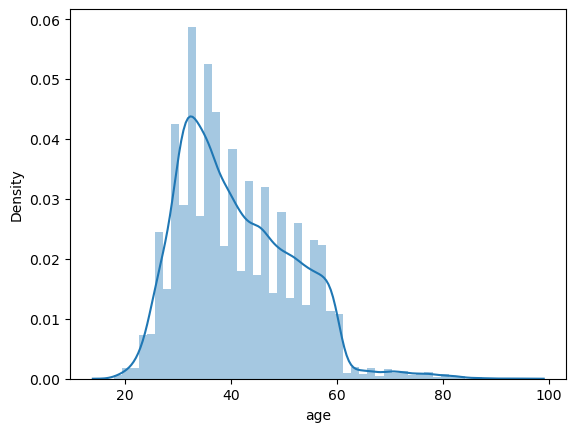

In [26]:
sns.distplot(df_train['age'])
#most of the client fall between 20 to 60.

<AxesSubplot:xlabel='age', ylabel='count'>

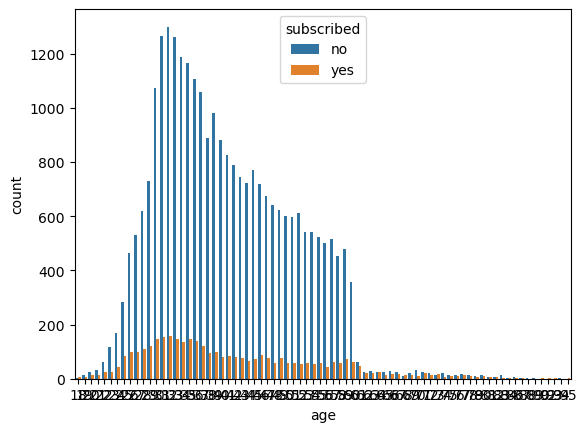

In [27]:
#will check age vs subscribed
sns.countplot(data=df_train,x='age', hue= 'subscribed')


In [28]:
pd.crosstab(df_train['job'],df_train['subscribed'])
#job vs subscribed cmparison of yes or no    

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


In [29]:
job =  pd.crosstab(df_train['job'],df_train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

<AxesSubplot:xlabel='job,subscribed'>

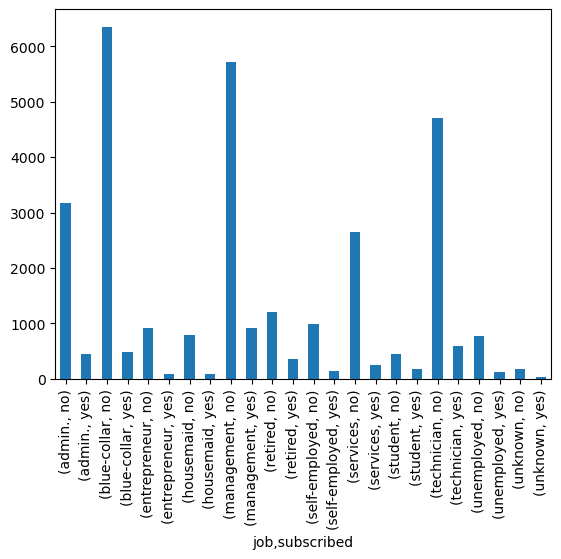

In [30]:
df_train.groupby('job')['subscribed'].value_counts().plot.bar()
#group wise age and subsribed

In [31]:
df_train['default'].value_counts()
#yes or no value count for default

no     31062
yes      585
Name: default, dtype: int64

<AxesSubplot:xlabel='default'>

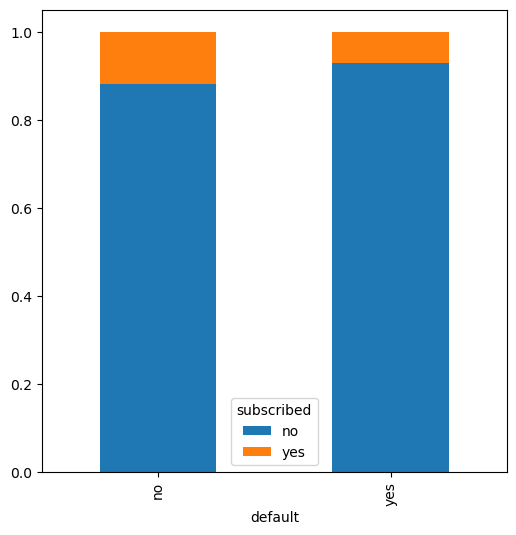

In [32]:
job =  pd.crosstab(df_train['default'],df_train['subscribed'])
dflt_norm = job.div(job.sum(1).astype(float), axis=0)

dflt_norm.plot.bar(stacked=True, figsize=(6,6))
# thode who are negative has slighlty higer chance to susribe for the same 

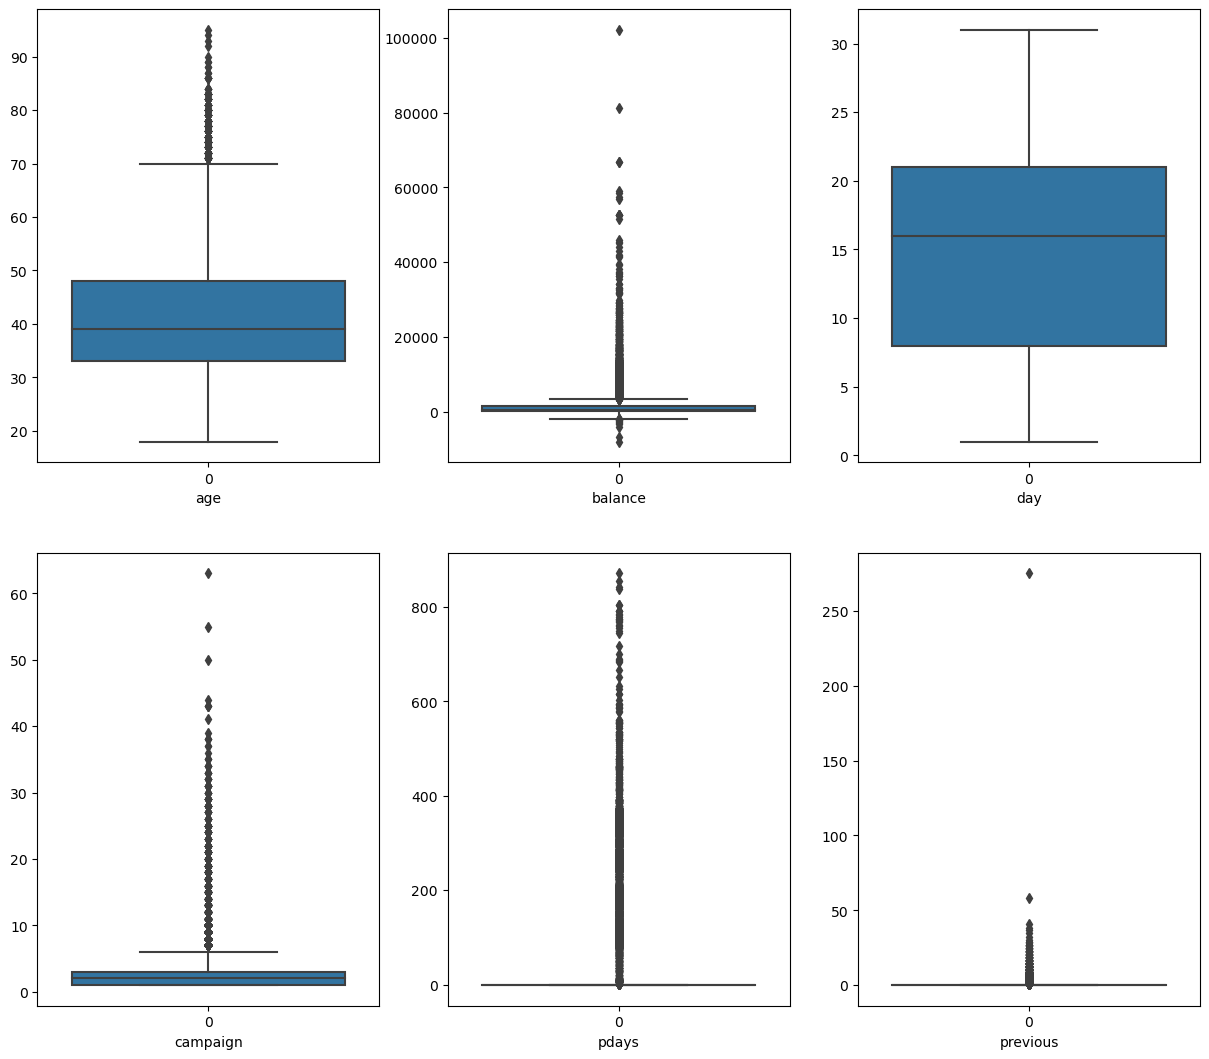

In [33]:
plt.figure(figsize=(15,20))

plotnumber = 1

for c in df_train[['age' ,'balance','day', 'campaign','pdays', 'previous']]:
    if plotnumber <=11:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data=df_train[c])
        plt.xlabel(c)
        
    plotnumber+=1
    
plt.show() 

#there is many outliers that we have to trest them 
#we can treat them using z score or iqr method

In [34]:
q1 = df_train.quantile(0.25)

q3 =df_train.quantile(0.75)

iqr = q3-q1
#iqr method for treating outlier

In [35]:
age = (q3.age + (1.5 * iqr.age))

abc = np.where(df_train['age'] > age)

df_train = df_train.drop(df_train.index[abc])

df_train.reset_index()
#for age 

,index,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31293,31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31294,31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31295,31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31296,31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [36]:
balance = (q3.balance + (1.5 * iqr.balance))

abc = np.where(df_train['balance'] > balance)

df_train = df_train.drop(df_train.index[abc])

df_train.reset_index()
#for balance 

,index,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28094,31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
28095,31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
28096,31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
28097,31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [37]:
campaign = (q3.campaign + (1.5 * iqr.campaign))

abc = np.where(df_train['campaign'] > campaign)

df_train = df_train.drop(df_train.index[abc])

df_train.reset_index()
#for campaign 

,index,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26194,31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
26195,31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
26196,31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
26197,31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no


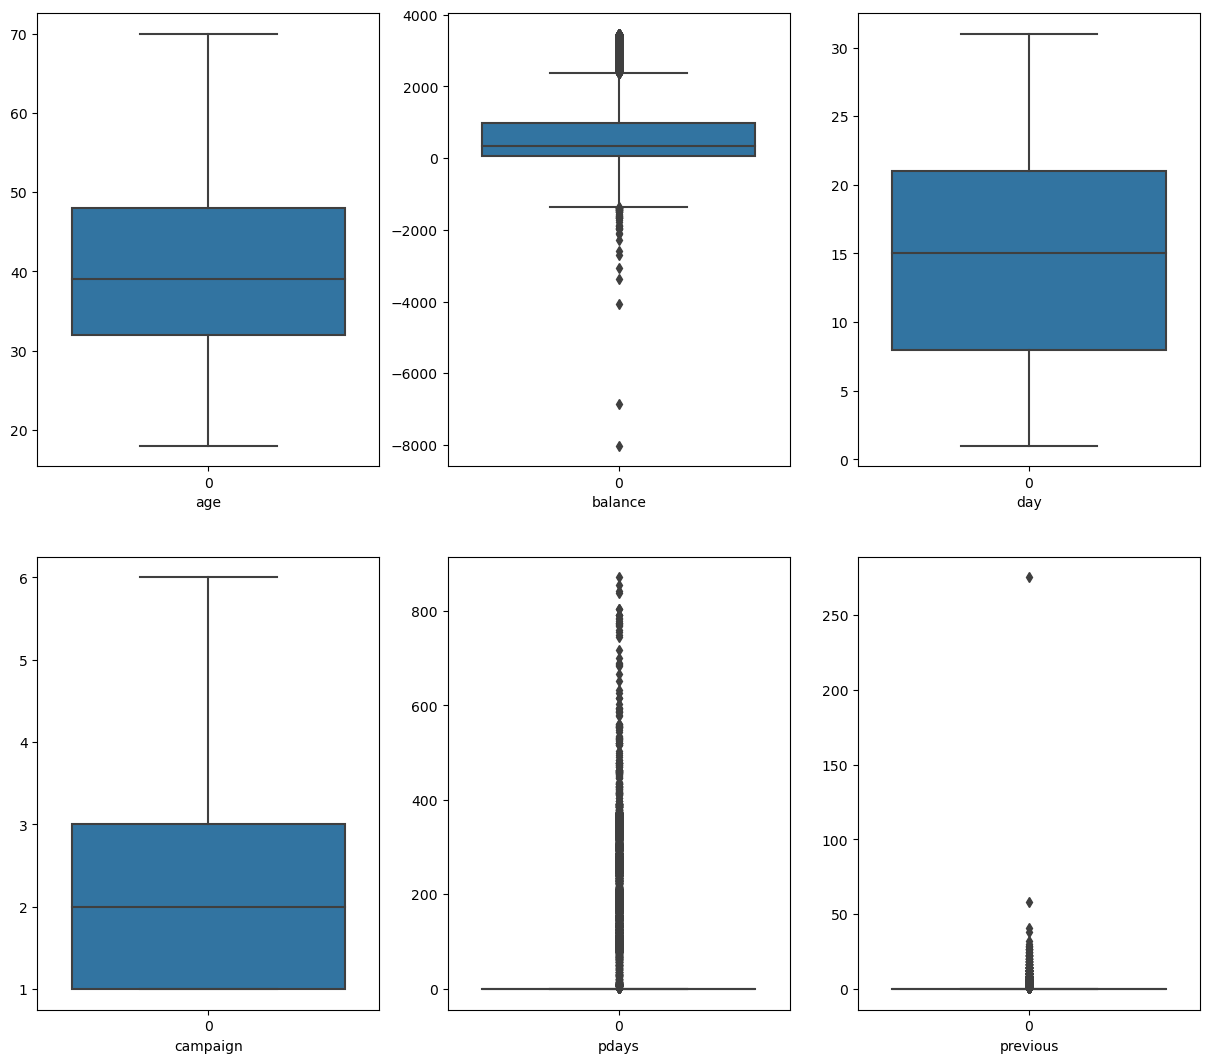

In [38]:
plt.figure(figsize=(15,20))

plotnumber = 1

for c in df_train[['age' ,'balance','day', 'campaign','pdays', 'previous']]:
    if plotnumber <=11:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data=df_train[c])
        plt.xlabel(c)
        
    plotnumber+=1
    
plt.show() 

In [39]:
# Converting the target variables into 0s and 1s
df_train['subscribed'].replace('no', 0,inplace=True)
df_train['subscribed'].replace('yes', 1,inplace=True)

In [40]:
df_train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31641    0
31642    0
31643    1
31644    0
31646    1
Name: subscribed, Length: 26199, dtype: int64

In [41]:
df_train = df_train.drop('poutcome',axis=1)

In [42]:
#generating dummy values on the train dataset
df_train = pd.get_dummies(df_train , columns = ['marital', 'education', 'contact', 'month','job','housing','loan','default'])
df_train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,marital_divorced,...,job_student,job_technician,job_unemployed,job_unknown,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
0,26110,56,1933,19,44,2,-1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,1,1,0,1,0,1,0
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,43962,57,3287,22,867,1,84,3,1,1,...,0,0,0,0,1,0,1,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,1,0,0,0,1,1,0,1,0


In [43]:
ab = df_train.corr()
ab
#corelation

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,marital_divorced,...,job_student,job_technician,job_unemployed,job_unknown,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
ID,1.000000,-0.051208,0.107902,-0.054700,-0.002231,-0.072159,0.438306,0.243845,0.288221,-3.157371e-02,...,0.123778,-0.001598,0.027656,-0.003875,0.159899,-0.159899,0.081212,-0.081212,0.052556,-0.052556
age,-0.051208,1.000000,0.080913,-0.008511,-0.015963,0.038060,-0.030800,-0.005606,-0.013142,1.724726e-01,...,-0.202512,-0.046506,0.001809,0.054482,0.150638,-0.150638,-0.008937,0.008937,0.011636,-0.011636
balance,0.107902,0.080913,1.000000,0.006678,0.032922,-0.025470,0.030847,0.033845,0.088667,-2.868032e-02,...,0.016415,-0.012349,0.014950,0.014466,0.060185,-0.060185,0.096511,-0.096511,0.141906,-0.141906
day,-0.054700,-0.008511,0.006678,1.000000,-0.025390,0.102679,-0.076942,-0.039344,-0.028483,7.707620e-03,...,-0.010802,0.027479,-0.000711,-0.012201,0.024024,-0.024024,-0.013604,0.013604,-0.009006,0.009006
duration,-0.002231,-0.015963,0.032922,-0.025390,1.000000,-0.024586,-0.004144,0.001406,0.385436,8.142312e-03,...,-0.005397,-0.008091,0.018158,-0.004549,-0.007106,0.007106,0.008532,-0.008532,0.007436,-0.007436
campaign,-0.072159,0.038060,-0.025470,0.102679,-0.024586,1.000000,-0.064737,-0.002309,-0.061077,-1.078020e-02,...,-0.024041,0.018542,-0.016347,-0.003597,0.035310,-0.035310,-0.004965,0.004965,-0.005259,0.005259
pdays,0.438306,-0.030800,0.030847,-0.076942,-0.004144,-0.064737,1.000000,0.414367,0.106226,2.953625e-03,...,0.024541,-0.011445,-0.013688,-0.009885,-0.124246,0.124246,0.020075,-0.020075,0.029902,-0.029902
previous,0.243845,-0.005606,0.033845,-0.039344,0.001406,-0.002309,0.414367,1.000000,0.085611,-3.336467e-03,...,0.018670,-0.000253,-0.011106,-0.004648,-0.036494,0.036494,0.006908,-0.006908,0.015496,-0.015496
subscribed,0.288221,-0.013142,0.088667,-0.028483,0.385436,-0.061077,0.106226,0.085611,1.000000,1.006519e-03,...,0.080058,-0.001236,0.022958,0.003724,0.140469,-0.140469,0.070462,-0.070462,0.017514,-0.017514
marital_divorced,-0.031574,0.172473,-0.028680,0.007708,0.008142,-0.010780,0.002954,-0.003336,0.001007,1.000000e+00,...,-0.051459,0.015932,0.000293,-0.014193,-0.002351,0.002351,-0.009860,0.009860,-0.021049,0.021049


In [44]:
target =df_train['subscribed']
train = df_train.drop('subscribed', axis=1)

In [45]:

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=12)

In [46]:
#creating an object of logistic regression model
lreg = LogisticRegression()
#fitting the data into the model
lreg.fit(x_train,y_train)
#Making predictions on the validation set
pred = lreg.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
#Calculating the accuracy score
accuracy_score(y_test,pred)
#We got an accuracy score of around 89% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

0.8935114503816793

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,digits = 2))
#classification report for logistic regression

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4655
           1       0.55      0.24      0.34       585

    accuracy                           0.89      5240
   macro avg       0.73      0.61      0.64      5240
weighted avg       0.87      0.89      0.87      5240



In [49]:
# DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
#making predictions on the validation set
predict = clf.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:

#Calculating the accuracy for DecisionTreeClassifier
accuracy_score(y_test,predict)

0.8879770992366413

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)


In [53]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [54]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=8 ,min_samples_leaf= 4,min_samples_split=3)

clf.fit(x_train,y_train)
#best params and traning data

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=8, min_samples_leaf=4,
                       min_samples_split=3)

In [55]:
# defined a funcution 
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        
        print('============trainresult===============')
        
        print(f'accuracy_score{accuracy_score(y_train,y_pred) *  100:.2f}%' )
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('============testresult===============')
        
        print(f'accurcy {accuracy_score(y_test,pred)* 100:.2f}%')
        
        print(classification_report(y_test,pred,digits = 2))

In [56]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better DecisionTreeClassifier

============trainresult===============
accuracy_score90.99%
============testresult===============
accurcy 90.78%
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4655
           1       0.60      0.54      0.57       585

    accuracy                           0.91      5240
   macro avg       0.77      0.75      0.76      5240
weighted avg       0.90      0.91      0.91      5240



In [57]:
test = pd.get_dummies(df_test)
#for a test data set converting object into integer

In [58]:
test.head()
#test head dataset

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [59]:
test_pred = clf.predict(test)
test_pred   
#prdeiction from logistic regression 

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [60]:
submissions = pd.DataFrame()
#data frame converted into 

In [61]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred
submissions['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

In [62]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)
#replacing value 0 and 1 from yes or no  as target variable is yes or no 

In [63]:

submissions['subscribed']
#check weather yes or no 

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [64]:
submissions.value_counts()
# value counts for final model 

ID     subscribed
1      no            1
30271  no            1
30207  no            1
30208  no            1
30210  no            1
                    ..
15252  no            1
15258  no            1
15260  no            1
15262  no            1
45206  yes           1
Length: 13564, dtype: int64

In [ ]:
# here is the final model for 